In [1]:
import numpy as np
import pandas as pd

I will learn how to :

- split a pandas object into pieces using one or more keys
- calculate group statistics e.g. mean, count or any user defined function
- apply within group transformations or other manipulations like normalization etc.

The main idea behind group operations is **split-apply-combine**

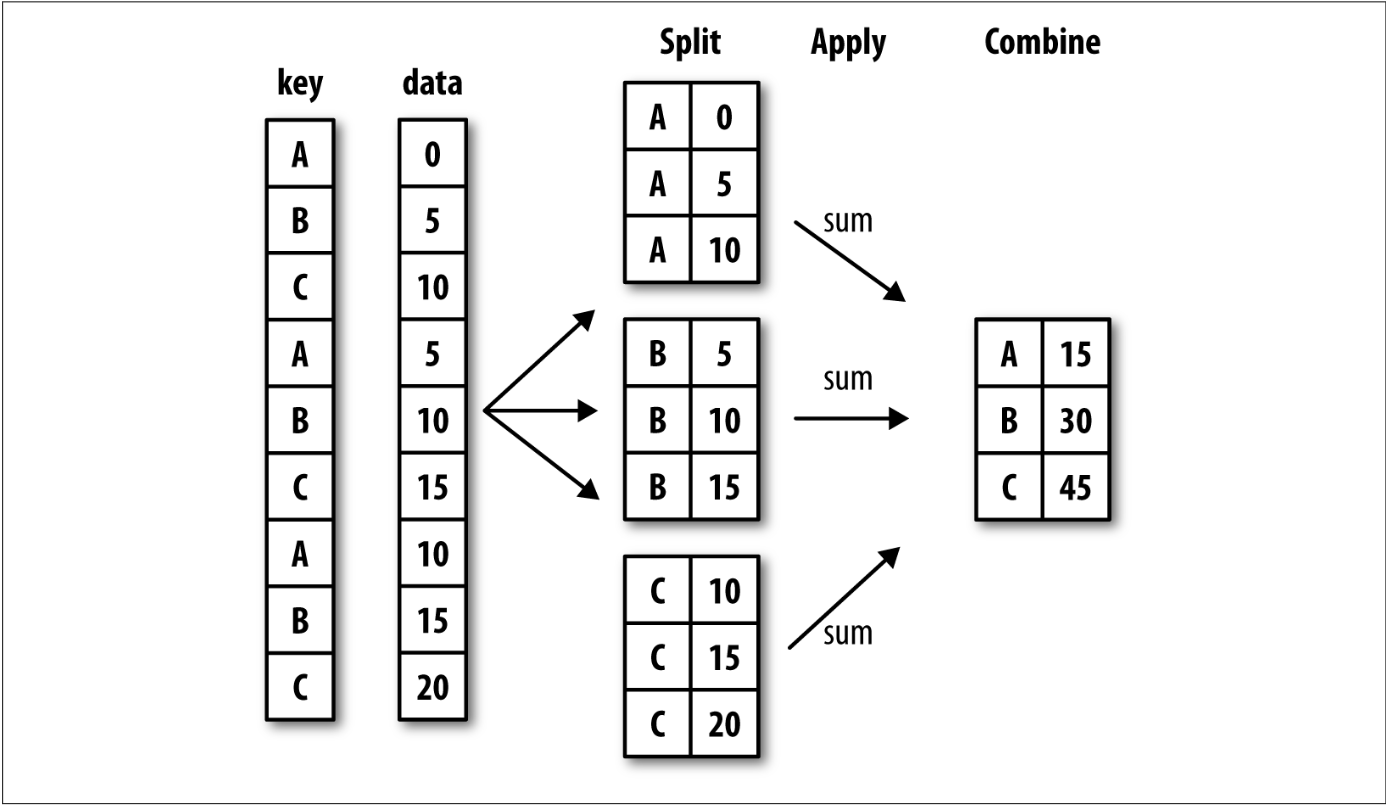

In [2]:
 df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
        'key2' : ['one', 'two', 'one', 'two', 'one'],
        'data1' : np.random.randn(5),
        'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.033189,1.210797
1,a,two,-1.372593,0.041397
2,b,one,-0.294956,-0.046733
3,b,two,0.071083,-0.125655
4,a,one,-0.354462,0.504443


Each grouping key can take various forms : 

- list of same length as the axis being grouped
- a value indicating a column name in a DataFrame

In [3]:
# compute mean of data1 groupby key1
grouped = df['data1'].groupby(df['key1'])
grouped

In [4]:
grouped.mean()

key1
a   -0.231289
b   -0.111936
Name: data1, dtype: float64

In [13]:
# an example of multiple groupings
means = df.data1.groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.339363
      two    -1.372593
b     one    -0.294956
      two     0.071083
Name: data1, dtype: float64

In [15]:
# another way of doing it
key = list('aabba')
df['data2'].groupby(key).mean()

a    0.585545
b   -0.086194
Name: data2, dtype: float64

In [19]:
# if grouping info is in the same DataFrame as the original one
# then we can do this

df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.231289,0.585545
b,-0.111936,-0.086194


In [20]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.339363  0.857620
     two  -1.372593  0.041397
b    one  -0.294956 -0.046733
     two   0.071083 -0.125655

In [21]:
# size method
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating Over Groups

In [25]:
for name,group in df.groupby('key1'):
    print(f'group name : {name}')
    print(group)

group name : a
  key1 key2     data1     data2
0    a  one  1.033189  1.210797
1    a  two -1.372593  0.041397
4    a  one -0.354462  0.504443
group name : b
  key1 key2     data1     data2
2    b  one -0.294956 -0.046733
3    b  two  0.071083 -0.125655
